Original Images


IndexError: list index out of range

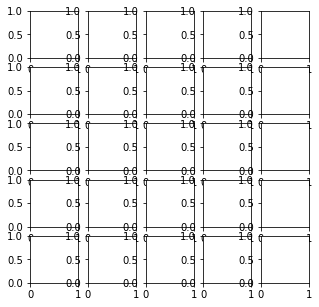

In [7]:
from PIL import Image
import scipy.stats
import glob
import numpy as np
from numpy import linalg as la
from pylab import *
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
from skimage.transform import resize

image=[]
flattened_images  =[]
def griddisplay(image_list):
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    k=0
    for row in range(5):
        for col in range(5):    
            resize(image_list[k],(100,100))
            image_plot = axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k +=1
    plt.show()
    
for filename in glob.glob('Eigenfaces/Train/*.jpg'):
    im=Image.open(filename)   
    im= np.asarray(im,dtype=float)/255.0 
    image.append(im)
print('Original Images')
griddisplay(image)
for i in range(len(image)):
    p=image[i].flatten()
    flattened_images.append(p)
A_transpose = np.matrix(flattened_images)
A = np.transpose(A_transpose)

mean= np.mean(A,1)
b= mean.reshape(425,425)
resized_mean = scipy.misc.imresize(np.asarray(b),(100,100),interp='bilinear', mode=None)
imshow(resized_mean,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Mean Face')
plt.show()

zero_mean =[]
column =0
Zero_mean_matrix= np.ones((180625,25))
for values in flattened_images:
    #zm = values-mean
    zm= A[:,column] - mean
    #print("z",zm.shape)
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] =zm
    zm_images = zm.resize(425,425)
    zero_mean.append(zm)
    column = column +1
print('Zero mean faces')
griddisplay(zero_mean)

d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/425
u_list =[]
w2, v2 = la.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)
    #norms = np.linalg.norm(u, axis=0)                           
    u = u / np.linalg.norm(u)
    #     minu = np.min(u)
    #     maxu = np.max(u)
    #     u = u-float(minu)
    #     u = u/float((maxu-minu)) 
    u_i= u.reshape(425,425)
    u_list.append(u_i)

print('eigrnfaces')
griddisplay(u_list)
